# Table of Contents
 <p><div class="lev1"><a href="#phenom-example---compare-with-mathematica-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>phenom example - compare with mathematica</a></div><div class="lev2"><a href="#comparison-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>comparison function</a></div>

# phenom example - compare with mathematica

In [1]:
import phenom

import lal
import lalsimulation as lalsim

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

/Users/sebastian/projects/phenEOB/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
matplotlib.rcParams.update({'font.size': 16})

## comparison function

In [3]:
from scipy import interpolate

def compare_phenom_with_lalsim(mass1=2., mass2=60., chi1=-1., chi2=1., d=1e6 * lal.PC_SI, flow=0.1, fhigh=0., df=1./64.):
    # first generate phenom version
    ph = phenom.PhenomD(m1=mass1, m2=mass2, chi1z=chi1, chi2z=chi2, f_min=flow, distance=d, delta_f=df, fRef=0., phiRef=10.)
    # get ph.htilde
    ph.IMRPhenomDGenerateFD()
    # now generate lalsimulation prediction
    lalsim_phend = lalsim.SimIMRPhenomDGenerateFD(10, 0, df, mass1*lal.MSUN_SI, mass2*lal.MSUN_SI, chi1, chi2, flow, fhigh, d)
    
    #amplitude
    #interpolate over common frequency
    phenomf = interpolate.interp1d(ph.flist_Hz, np.absolute(ph.htilde))
    lalsimx = np.arange(lalsim_phend.data.length) * lalsim_phend.deltaF
    lalsimy = np.absolute(lalsim_phend.data.data)
    lalsimf = interpolate.interp1d(lalsimx, lalsimy)
    
    xnew = ph.flist_Hz
    
    ynew = lalsimf(xnew)
    phenomy_new = phenomf(xnew)

    #plot results
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    fig.suptitle('amplitude comparison')
    ax[0].plot(xnew, ynew)
    ax[0].plot(xnew, phenomy_new)
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('$f(Hz)$')
    ax[0].set_ylabel('$|h(f)|$')

    ax[1].plot(xnew, np.abs(ynew - phenomy_new) / phenomy_new)
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('$f(Hz)$')
    ax[1].set_ylabel('$|h(f)|$')

    fig.tight_layout()
    
    
    #phase
    #interpolate over common frequency
    
    phenomf = interpolate.interp1d(ph.flist_Hz, np.unwrap(np.angle(ph.htilde)) )
    lalsimx = np.arange(lalsim_phend.data.length) * lalsim_phend.deltaF
    lalsimy = np.unwrap(np.angle(lalsim_phend.data.data))
    lalsimf = interpolate.interp1d(lalsimx, lalsimy)
    
    xnew = ph.flist_Hz
    
    ynew = lalsimf(xnew)
    phenomy_new = phenomf(xnew)

    #plot results
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    fig.suptitle('phase comparison')
#     phenomy_new = -phenomy_new + (ynew+phenomy_new)
#     phenomy_new = -phenomy_new
    print "[lalsim] phi(0) = ", ynew[0]
    print "[phenom] phi(0) = ", phenomy_new[0]
    print "[lalsim] phi(0) - [phenom] phi(0) = ", phenomy_new[0] - ynew[0]
    ax[0].plot(xnew, ynew )
    ax[0].plot(xnew, phenomy_new)
#     ax[0].set_xscale('log')
#     ax[0].set_yscale('log')
    ax[0].set_xlabel('$f(Hz)$')
    ax[0].set_ylabel('$\phi(f)$')
    ax[0].set_ylim(-100,1000)
    ax[0].set_xlim(10,500)

    ax[1].plot(xnew, np.abs(ynew - phenomy_new))
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('$f(Hz)$')
    ax[1].set_ylabel('$\phi(f)$')

    fig.tight_layout()
    
    

[lalsim] phi(0) =  1.15044407846
[phenom] phi(0) =  1.15044407846
[lalsim] phi(0) - [phenom] phi(0) =  0.0


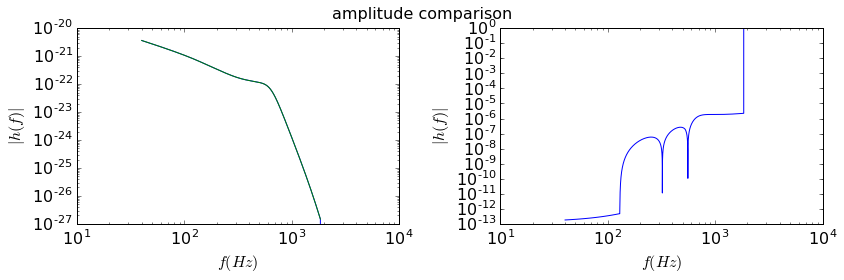

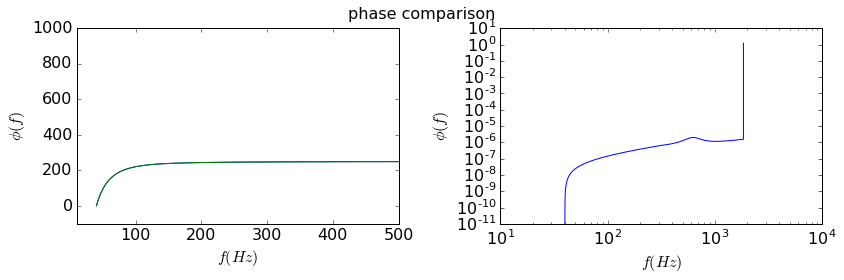

In [4]:
# compare_phenom_with_lalsim(mass1=2., mass2=60., chi1=-1., chi2=1., d=1e6 * lal.PC_SI, flow=20, fhigh=0., df=1./64.)
compare_phenom_with_lalsim(mass1=20., mass2=2., chi1=0., chi2=0., d=1e6 * lal.PC_SI, flow=40, fhigh=0., df=1./32.)